Type something to test this out: Create a color function which returns a single hue and saturation with. different values (HSV). Accepted values are color strings as usable by PIL/Pillow.


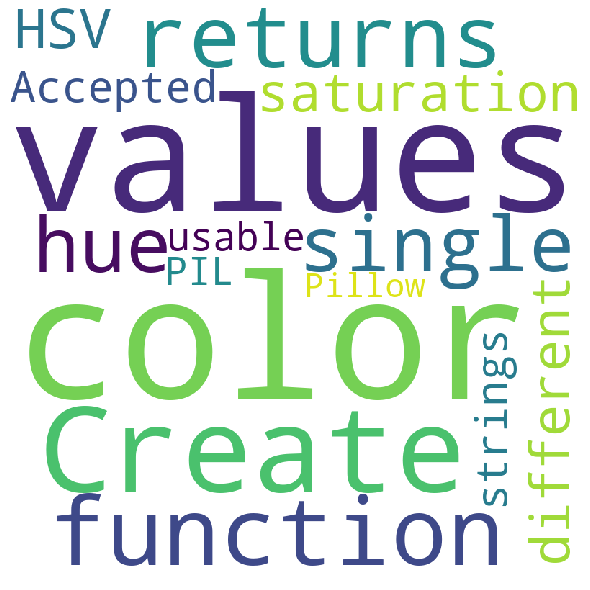

In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

comment_words=input("Type something to test this out: ")
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

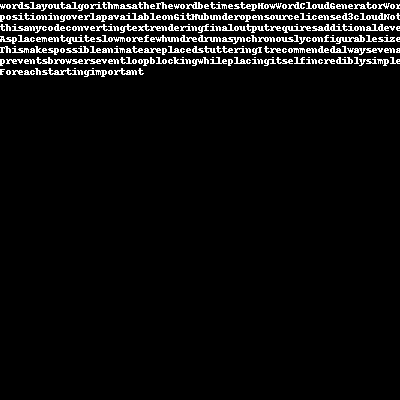

In [2]:
from collections import Counter
import re
#for image
from PIL import Image, ImageDraw, ImageFont
font_path = "Stay Happy.ttf"
def read_words(words_file):
    return [word for line in open(words_file, 'r') for word in line.split()]

#reading the text input
#comment_words=input("Type something to test this out: ")
comment_words='How the Word Cloud Generator Works The layout algorithm for positioning words without overlap is available on GitHub under an open source license as d3-cloud. Note that this is the only the layout algorithm and any code for converting text into words and rendering the final output requires additional development. As word placement can be quite slow for more than a few hundred words, the layout algorithm can be run asynchronously, with a configurable time step size. This makes it possible to animate words as they are placed without stuttering. It is recommended to always use a time step even without animations as it prevents the browser’s event loop from blocking while placing the words. The layout algorithm itself is incredibly simple. For each word, starting with the most “important”:'

word_list=comment_words.split()
trimed_word=[]
for word in word_list:
    trimed_word.append(re.sub('[^A-Za-z0-9]+', '', word))

stopWords=set(read_words('stopwords.txt'))

#couting to occurence of each word and removing the stop words
for word in trimed_word:
    if word  in stopWords:
        trimed_word.remove(word)
freqDict=dict(Counter(trimed_word))
#print(freqDict)
freDict=sorted(freqDict.items(), key=lambda x: x[1], reverse=True)
#print(freDict)

#creating image from words
W = 400 
H = 400 
#image=Image.fromarray(freDict)
image = Image.new('RGB',(W,H),color='rgb(0, 0, 0)')
draw = ImageDraw.Draw(image)
#font = ImageFont.truetype('Roboto-Bold.ttf', size=45)

font_size=100

x=0
y=0
position=[]
for word in freDict: 
    position.append((x,y))
    #print()
    w, h = draw.textsize(word[0])
   # print(w,h)
    font = ImageFont.truetype(font_path, font_size)
    message = word[0]
    color = '#FFFFFF' 
    draw.text((x,y), message, fill=color)
    x=x+w
    #print(x,y)
    #y=y+h
    if x>W:
        x=0
        y=y+h
    
# save the edited image
image.save('greeting_card.png')
display(image)
#image.show()



In [4]:
from flask import Flask, jsonify, request, render_template
from flask_cors import CORS

app = Flask(__name__)
CORS(app)

@app.route('/hello', methods=['GET', 'POST'])
def hello():

    # POST request
    if request.method == 'POST':
        print('Incoming..')
        print(request.get_json())  # parse as JSON
        return 'OK', 200

    # GET request
    else:
        message = {'greeting':'Hello from Flask!'}
        return jsonify(message)  # serialize and use JSON headers

@app.route('/test')
def test_page():
    # look inside `templates` and serve `index.html`
    return render_template('index.html')
if __name__ == "__main__":
	app.run()

ModuleNotFoundError: No module named 'flask_cors'